![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import datetime
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m-%d")

In [2]:
df_BRENT = pd.read_csv('BRENT.csv')
df_WTI = pd.read_csv('WTI.csv')

In [3]:
df_BRENT.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,75.849998,76.529999,75.440002,75.739998,2575,0,0,2007-07-30
1,75.699997,77.169998,75.669998,77.050003,3513,0,0,2007-07-31
2,77.000000,77.059998,74.860001,75.349998,3930,0,0,2007-08-01
3,75.220001,76.209999,74.269997,75.760002,6180,0,0,2007-08-02
4,75.389999,76.000000,74.529999,74.750000,4387,0,0,2007-08-03


In [4]:
#MERGE BOTH DATAFRAMES INTO A SINGLE ONE
df = pd.merge(df_BRENT,df_WTI[['Date','Close']],left_on='Date',right_on='Date',how='left')
df = df.rename(columns={'Close_x': 'Close_BRENT', 'Close_y': 'Close_WTI'})
df = df[['Date','Close_BRENT','Close_WTI']]
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Close_BRENT,Close_WTI
0,2007-07-30,75.739998,76.830002
1,2007-07-31,77.050003,78.209999
2,2007-08-01,75.349998,76.529999
3,2007-08-02,75.760002,76.860001
4,2007-08-03,74.750000,75.480003
...,...,...,...
3784,2022-10-31,94.830002,86.529999
3785,2022-11-01,94.650002,88.370003
3786,2022-11-02,96.160004,90.000000
3787,2022-11-03,94.669998,88.169998


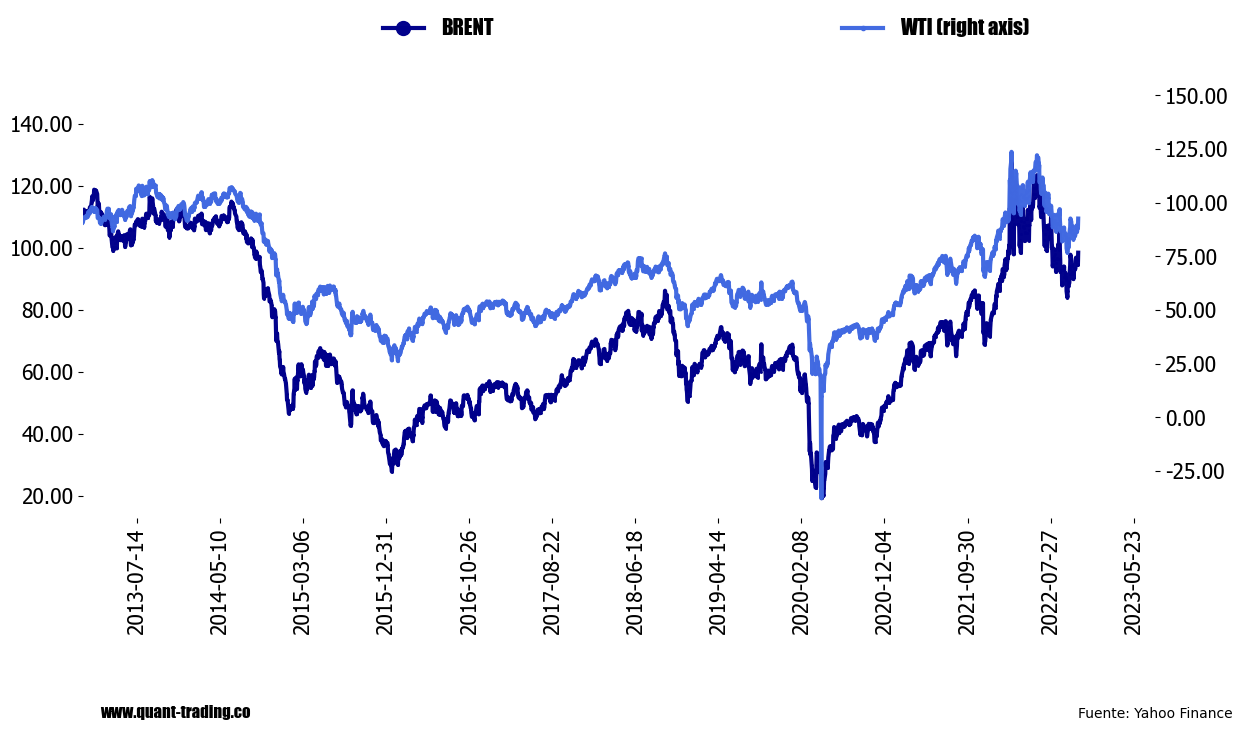

In [5]:
#------------------------BRENT VS WTI CHART----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 300

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['Date'],df['Close_BRENT'],marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='BRENT',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([datetime.datetime(2012, 12, 31), None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(df['Date'],df['Close_WTI'],marker='o',linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='WTI (right axis)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([datetime.datetime(2012, 12, 31), None, None, None])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1], -140,'Fuente: Yahoo Finance' , color='black', fontsize=10)
plt.text(datetime.datetime(2013, 3, 1), -140,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [6]:
ASSET1 = 'Close_BRENT'
ASSET2 = 'Close_WTI'
n = 30

#CREACIÓN DE LA SEÑAL
df_pair = pd.DataFrame()
df_pair['DATE'] = df['Date']
df_pair['ASSET1'] = df[ASSET1]
df_pair['ASSET2'] = df[ASSET2]
df_pair['LOG_RET'] = np.log(df[ASSET1])-np.log(df[ASSET2])
df_pair['MA'] = df_pair['LOG_RET'].rolling(window=n).mean()         #MOVING AVERAGE
df_pair['Diff'] = df_pair['LOG_RET'] - df_pair['MA']
df_pair['Diff**2'] = (df_pair['LOG_RET'] - df_pair['MA'])**2
df_pair['MA_SR'] = (df_pair['Diff**2'].rolling(window=n).mean())**0.5
df_pair['QUOTIENT'] = df_pair['Diff'][1:].values/df_pair['MA_SR'][:-1]
df_pair['QUOTIENT']=df_pair['QUOTIENT'].shift(periods=1) 
df_pair['POSITION'] = ""
df_pair['TRADE'] = ""
df_pair = df_pair.iloc[2*n:]
df_pair

,DATE,ASSET1,ASSET2,LOG_RET,MA,Diff,Diff**2,MA_SR,QUOTIENT,POSITION,TRADE
60,2007-10-23,82.849998,85.269997,-0.028791,-0.037877,0.009086,0.000083,0.013843,0.657875,,
61,2007-10-24,84.370003,87.099998,-0.031845,-0.037995,0.006150,0.000038,0.013730,0.444280,,
62,2007-10-25,87.480003,90.459999,-0.033498,-0.037852,0.004354,0.000019,0.013251,0.317138,,
63,2007-10-26,88.690002,91.860001,-0.035119,-0.037786,0.002668,0.000007,0.012812,0.201327,,
64,2007-10-29,90.320000,93.529999,-0.034923,-0.037431,0.002508,0.000006,0.011907,0.195736,,
...,...,...,...,...,...,...,...,...,...,...,...
3784,2022-10-31,94.830002,86.529999,0.091595,0.076850,0.014745,0.000217,0.014861,1.007795,,
3785,2022-11-01,94.650002,88.370003,0.068653,0.076788,-0.008134,0.000066,0.014923,-0.547346,,
3786,2022-11-02,96.160004,90.000000,0.066204,0.076334,-0.010131,0.000103,0.014876,-0.678855,,
3787,2022-11-03,94.669998,88.169998,0.071130,0.076033,-0.004902,0.000024,0.014750,-0.329552,,


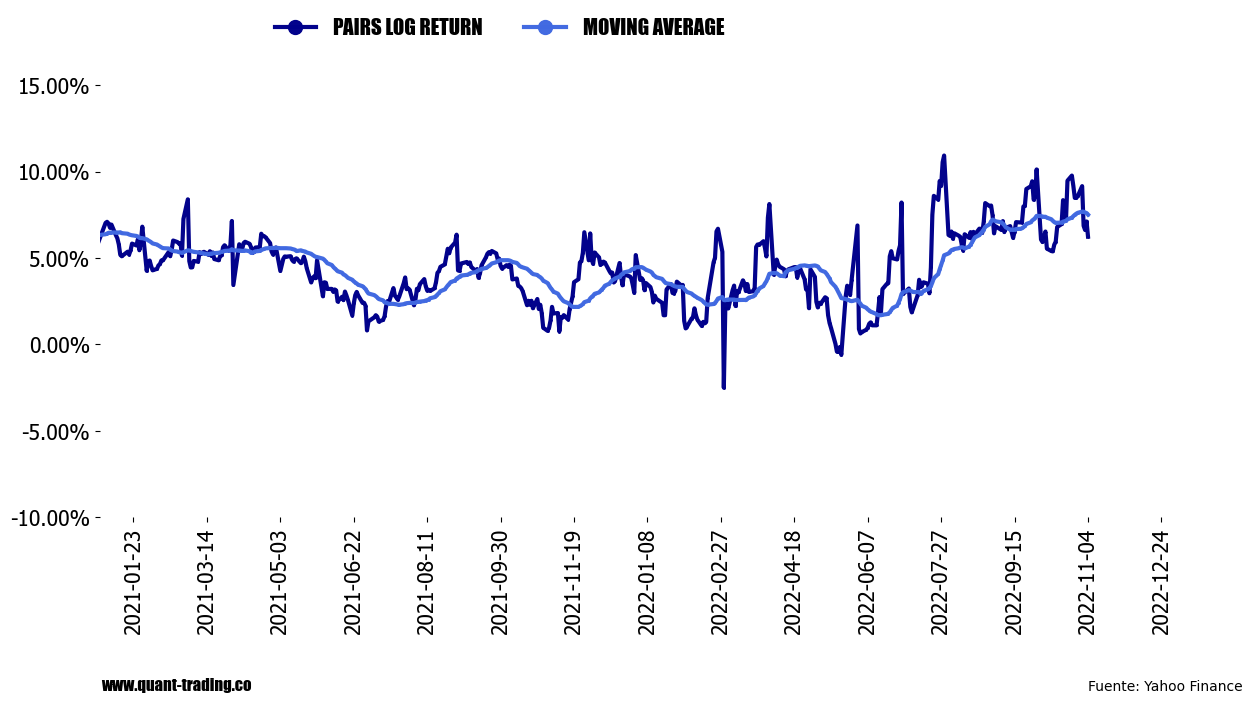

In [7]:
#------------------------LOG RETURN VS MOVING AVERAGE----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 50

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_pair['DATE'],df_pair['LOG_RET']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='PAIRS LOG RETURN',markersize=1)
ax1.plot(df_pair['DATE'],df_pair['MA']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='MOVING AVERAGE',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.6, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([datetime.datetime(2020, 12, 31), datetime.datetime(2022, 12, 31), -10, 15])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1], -20,'Fuente: Yahoo Finance' , color='black', fontsize=10)
plt.text(datetime.datetime(2021, 1, 1), -20,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

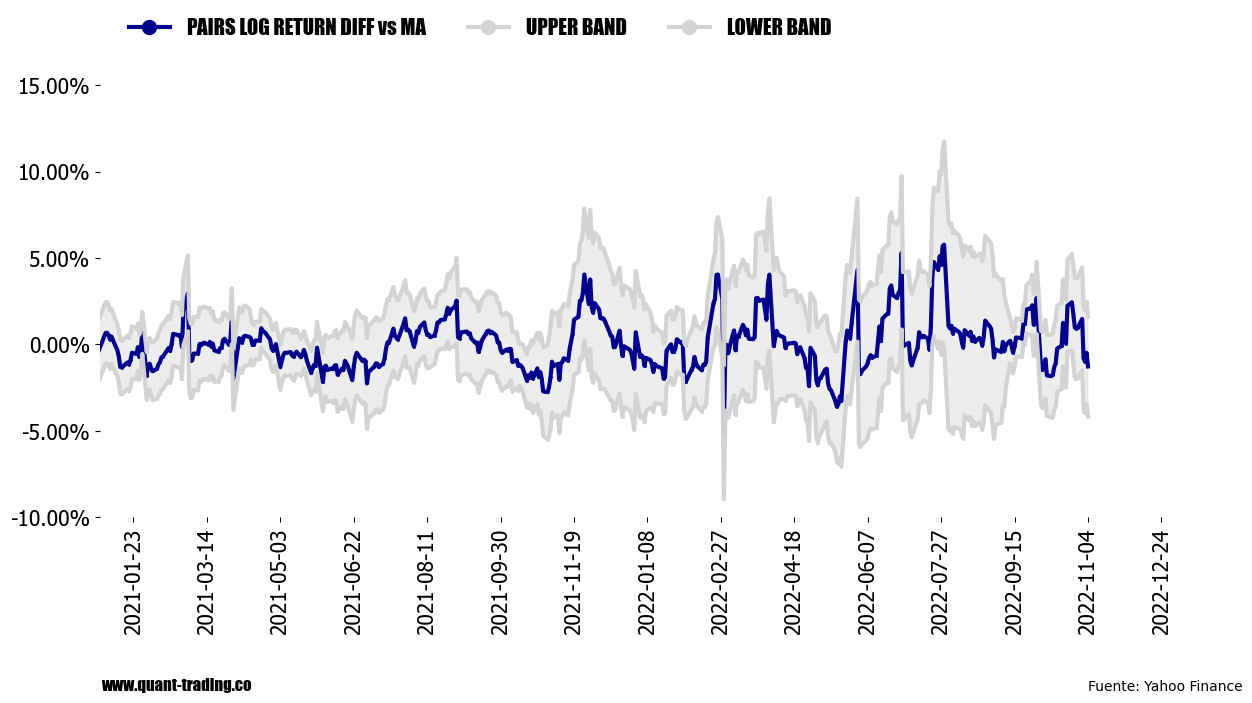

In [8]:
#------------------------RETURN DIFFERENCE VS MOVING AVERAGE - UPPER AND LOWER BANDS----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 50

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_pair['DATE'],df_pair['Diff']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='PAIRS LOG RETURN DIFF vs MA',markersize=1)
ax1.plot(df_pair['DATE'],df_pair['Diff']*100+2*df_pair['MA_SR']*100,marker='o', linestyle='solid',linewidth=3,color='lightgrey',alpha=0.99,label='UPPER BAND',markersize=1)
ax1.plot(df_pair['DATE'],df_pair['Diff']*100-2*df_pair['MA_SR']*100,marker='o', linestyle='solid',linewidth=3,color='lightgrey',alpha=0.99,label='LOWER BAND',markersize=1)
ax1.fill_between(df_pair['DATE'],df_pair['Diff']*100+2*df_pair['MA_SR']*100,df_pair['Diff']*100-2*df_pair['MA_SR']*100,color='lightgrey', alpha= 0.4)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.7, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([datetime.datetime(2020, 12, 31), datetime.datetime(2022, 12, 31), -10, 15])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1], -20,'Fuente: Yahoo Finance' , color='black', fontsize=10)
plt.text(datetime.datetime(2021, 1, 1), -20,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

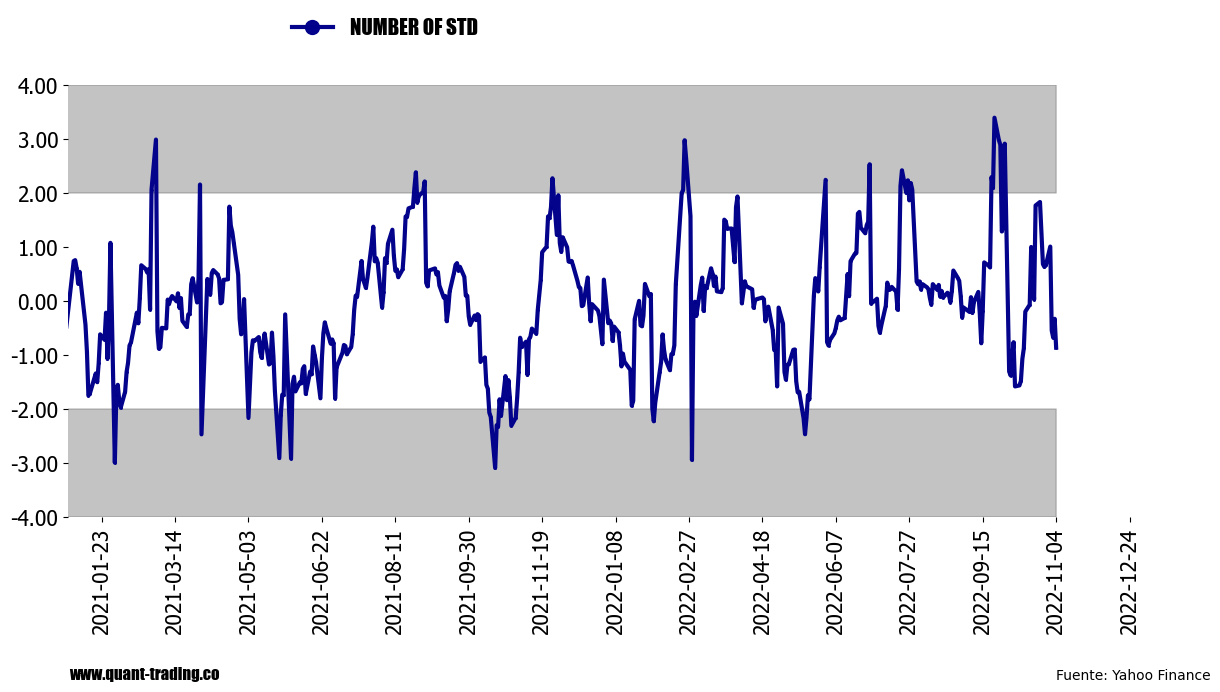

In [9]:
#------------------------BRENT VS WTI CHART----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 50

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_pair['DATE'],df_pair['QUOTIENT'],marker='o',linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='NUMBER OF STD',markersize=1)
ax1.fill_between(df_pair['DATE'],-2,-4,color='dimgrey', alpha= 0.4)
ax1.fill_between(df_pair['DATE'],2,4,color='dimgrey', alpha= 0.4)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([datetime.datetime(2020, 12, 31), datetime.datetime(2022, 12, 31), -4, 4])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1], -7,'Fuente: Yahoo Finance' , color='black', fontsize=10)
plt.text(datetime.datetime(2021, 1, 1), -7,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [10]:
#BUY SIGNAL MEANS YOU BUY ASSET1 AND SELL ASSET2. SELL SIGNAL MEANS THE OPPOSITE
#BACKTESTING
#Parameters initialization
UP = 2
DOWN = -2
PROFIT = 0
df_pair['POSITION'].iloc[0]  = 'FLAT' 
POSITION = 'FLAT'
TRADE = 'NTG'

#FUNCTION TO CALCULATE ACTUAL POSITION AND THE TRADING SIGNAL
def calculate_position(QUOTIENT):  
        
    global POSITION
    global TRADE     
    
    if POSITION == 'FLAT':        
        if QUOTIENT > UP:
            TRADE = 'SELL'
            POSITION = 'SHORT'
        elif QUOTIENT < DOWN:
            TRADE = 'BUY'
            POSITION = 'LONG'
        else: 
            TRADE = 'NTG'
            POSITION = 'FLAT'
    
    elif POSITION == 'SHORT':
        if QUOTIENT < PROFIT:
            TRADE = 'BUY'
            POSITION = 'FLAT'
        else: 
            TRADE = 'NTG'
            POSITION = 'SHORT'
    
    elif POSITION == 'LONG':    
        if QUOTIENT > PROFIT:
            TRADE = 'SELL'
            POSITION = 'FLAT'
        else: 
            TRADE = 'NTG'
            POSITION = 'LONG'       
        
    return POSITION, TRADE

#ASSIGN RESULTS TO DE DATAFRAME
results = df_pair.apply(lambda row: calculate_position(QUOTIENT=row['QUOTIENT']),axis=1)
df_pair['POSITION'] = [x[0] for x in results]
df_pair['TRADE'] = [x[1] for x in results]
df_pair

,DATE,ASSET1,ASSET2,LOG_RET,MA,Diff,Diff**2,MA_SR,QUOTIENT,POSITION,TRADE
60,2007-10-23,82.849998,85.269997,-0.028791,-0.037877,0.009086,0.000083,0.013843,0.657875,FLAT,NTG
61,2007-10-24,84.370003,87.099998,-0.031845,-0.037995,0.006150,0.000038,0.013730,0.444280,FLAT,NTG
62,2007-10-25,87.480003,90.459999,-0.033498,-0.037852,0.004354,0.000019,0.013251,0.317138,FLAT,NTG
63,2007-10-26,88.690002,91.860001,-0.035119,-0.037786,0.002668,0.000007,0.012812,0.201327,FLAT,NTG
64,2007-10-29,90.320000,93.529999,-0.034923,-0.037431,0.002508,0.000006,0.011907,0.195736,FLAT,NTG
...,...,...,...,...,...,...,...,...,...,...,...
3784,2022-10-31,94.830002,86.529999,0.091595,0.076850,0.014745,0.000217,0.014861,1.007795,FLAT,NTG
3785,2022-11-01,94.650002,88.370003,0.068653,0.076788,-0.008134,0.000066,0.014923,-0.547346,FLAT,NTG
3786,2022-11-02,96.160004,90.000000,0.066204,0.076334,-0.010131,0.000103,0.014876,-0.678855,FLAT,NTG
3787,2022-11-03,94.669998,88.169998,0.071130,0.076033,-0.004902,0.000024,0.014750,-0.329552,FLAT,NTG


In [12]:
#CALCULATE RETURNS AND DRAWDOWN OF THE TRADING STRATEGY
df_trades = df_pair[df_pair['POSITION'].isin(['LONG', 'SHORT']) | df_pair['TRADE'].isin(['BUY', 'SELL'])]  # Filtra las filas cuando hay posición
df_trades['RETURN'] = df_trades['LOG_RET'].shift(-1) - df_trades['LOG_RET']  # Ajusta para los retornos

conditions = [
    (df_trades['POSITION'] == 'SHORT'),
    (df_trades['POSITION'] == 'LONG'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'BUY'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

df_trades['RETURN_SIGN'] = np.select(conditions, choices, default=np.nan)  # Cambia 'null' por np.nan
df_trades['RETURN_SIGN'] = df_trades['RETURN_SIGN'].astype(float)
df_trades.loc[((df_trades.POSITION == 'SHORT') & (df_trades.TRADE == 'SELL')) |
              ((df_trades.POSITION == 'LONG') & (df_trades.TRADE == 'BUY')), 'RETURN'] = 0
df_trades['DISCRETE_RETURN'] = np.exp(df_trades['RETURN'] * df_trades['RETURN_SIGN']) - 1
df_trades['CUM_RETURN'] = (1 + df_trades['DISCRETE_RETURN']).cumprod() - 1
df_trades['WEALTH_INDEX'] = 100 * (1 + df_trades['CUM_RETURN'])
df_trades['PREV_PEAK'] = df_trades['WEALTH_INDEX'].cummax()
df_trades['MAX_DRAWDOWN'] = (df_trades['WEALTH_INDEX'] - df_trades['PREV_PEAK']) / df_trades['PREV_PEAK']

print(df_trades)

           DATE     ASSET1     ASSET2   LOG_RET        MA      Diff   Diff**2  \
85   2007-11-28  89.809998  90.620003 -0.008979 -0.033801  0.024822  0.000616   
86   2007-11-29  90.220001  91.010002 -0.008718 -0.032421  0.023703  0.000562   
87   2007-11-30  88.260002  88.709999 -0.005086 -0.030725  0.025640  0.000657   
88   2007-12-03  89.800003  89.309998  0.005472 -0.028682  0.034154  0.001166   
89   2007-12-04  89.529999  88.320000  0.013607 -0.026554  0.040161  0.001613   
...         ...        ...        ...       ...       ...       ...       ...   
3760 2022-09-27  86.269997  78.500000  0.094383  0.071716  0.022667  0.000514   
3761 2022-09-28  89.320000  82.150002  0.083679  0.072339  0.011339  0.000129   
3762 2022-09-29  88.489998  81.230003  0.085605  0.073160  0.012445  0.000155   
3763 2022-09-30  87.959999  79.489998  0.101251  0.074364  0.026887  0.000723   
3764 2022-10-03  88.860001  83.629997  0.060660  0.074270 -0.013610  0.000185   

         MA_SR  QUOTIENT PO

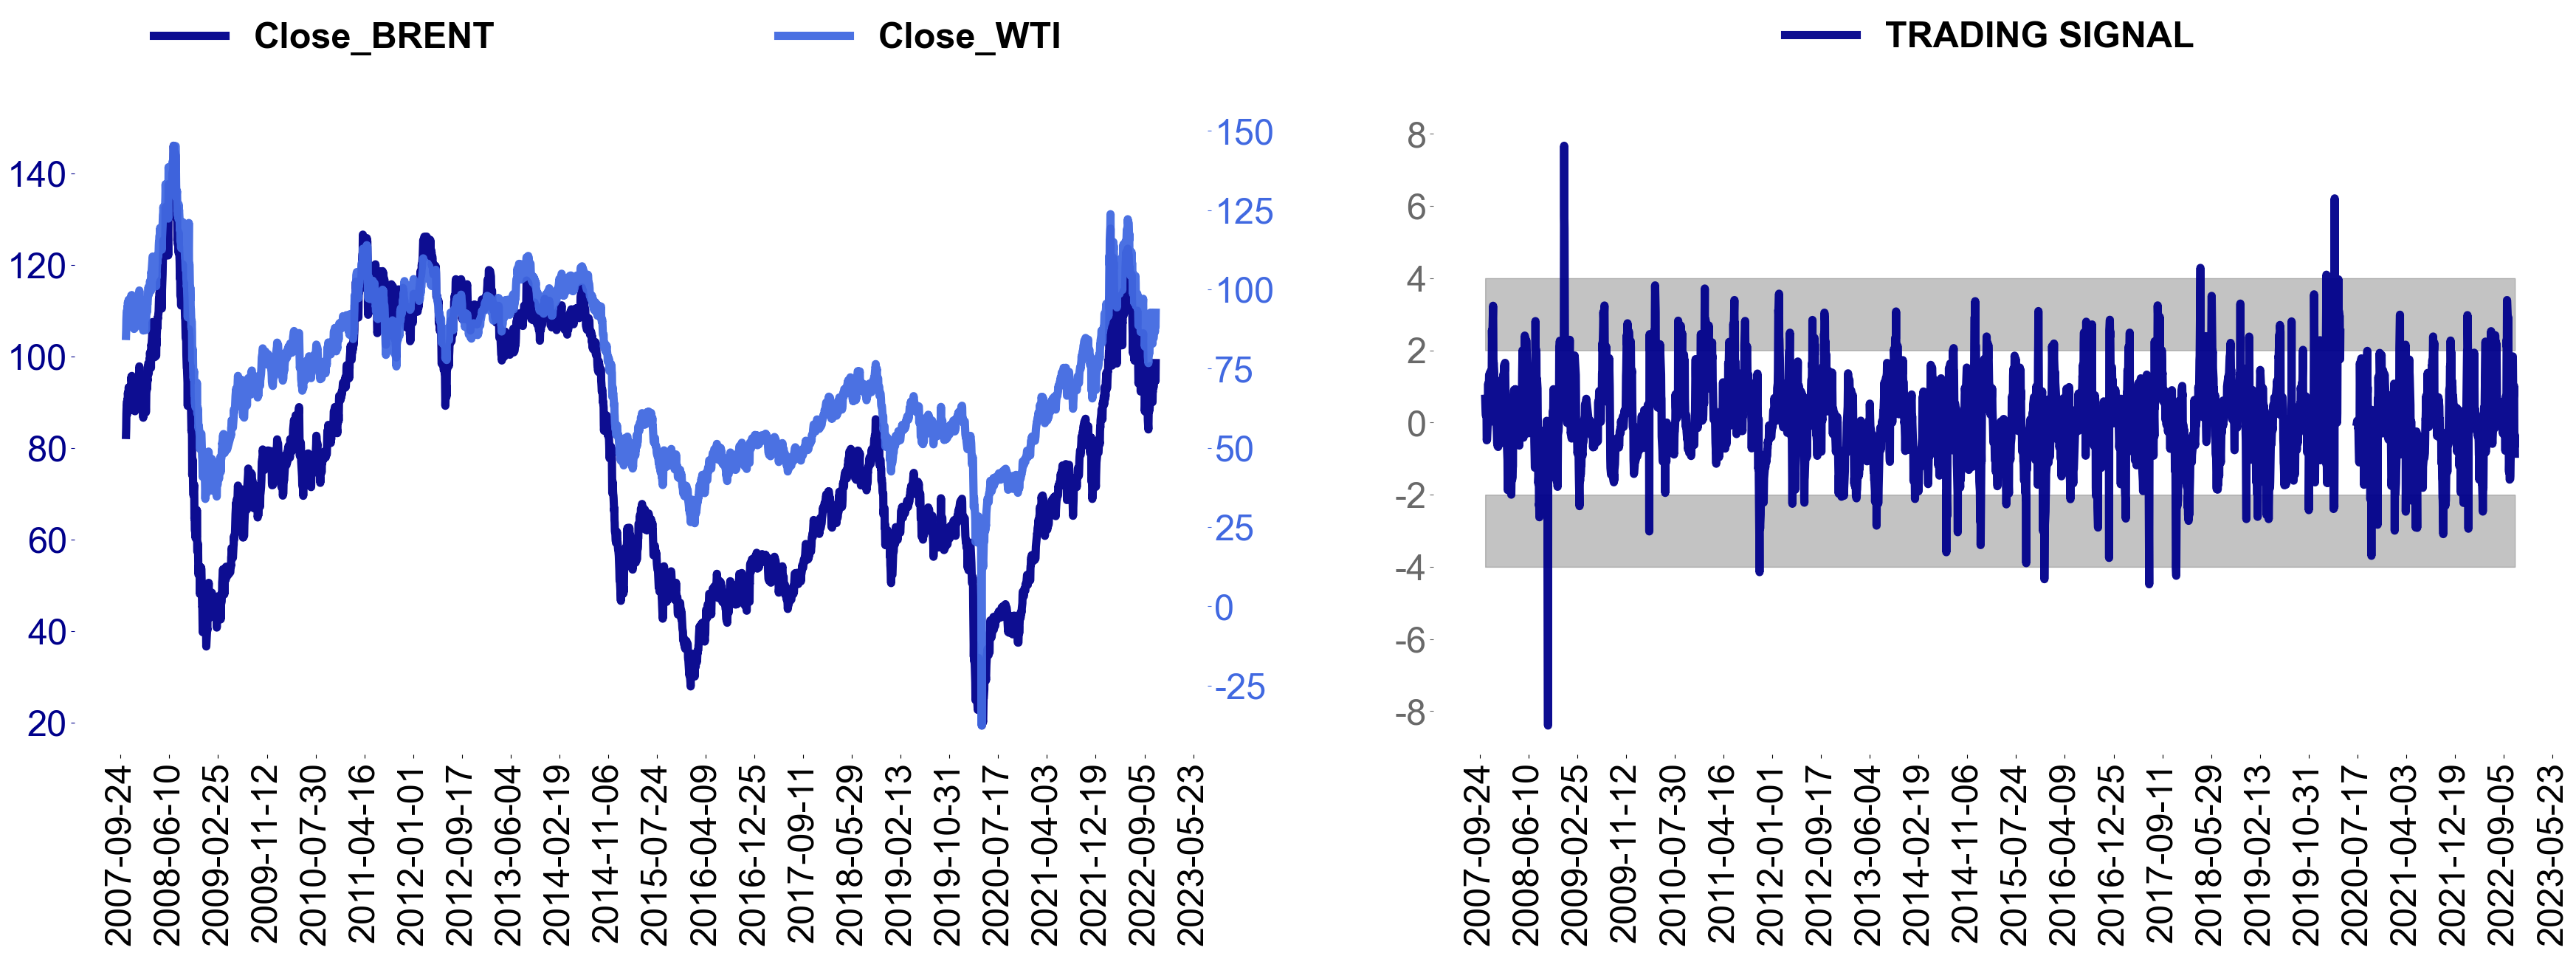

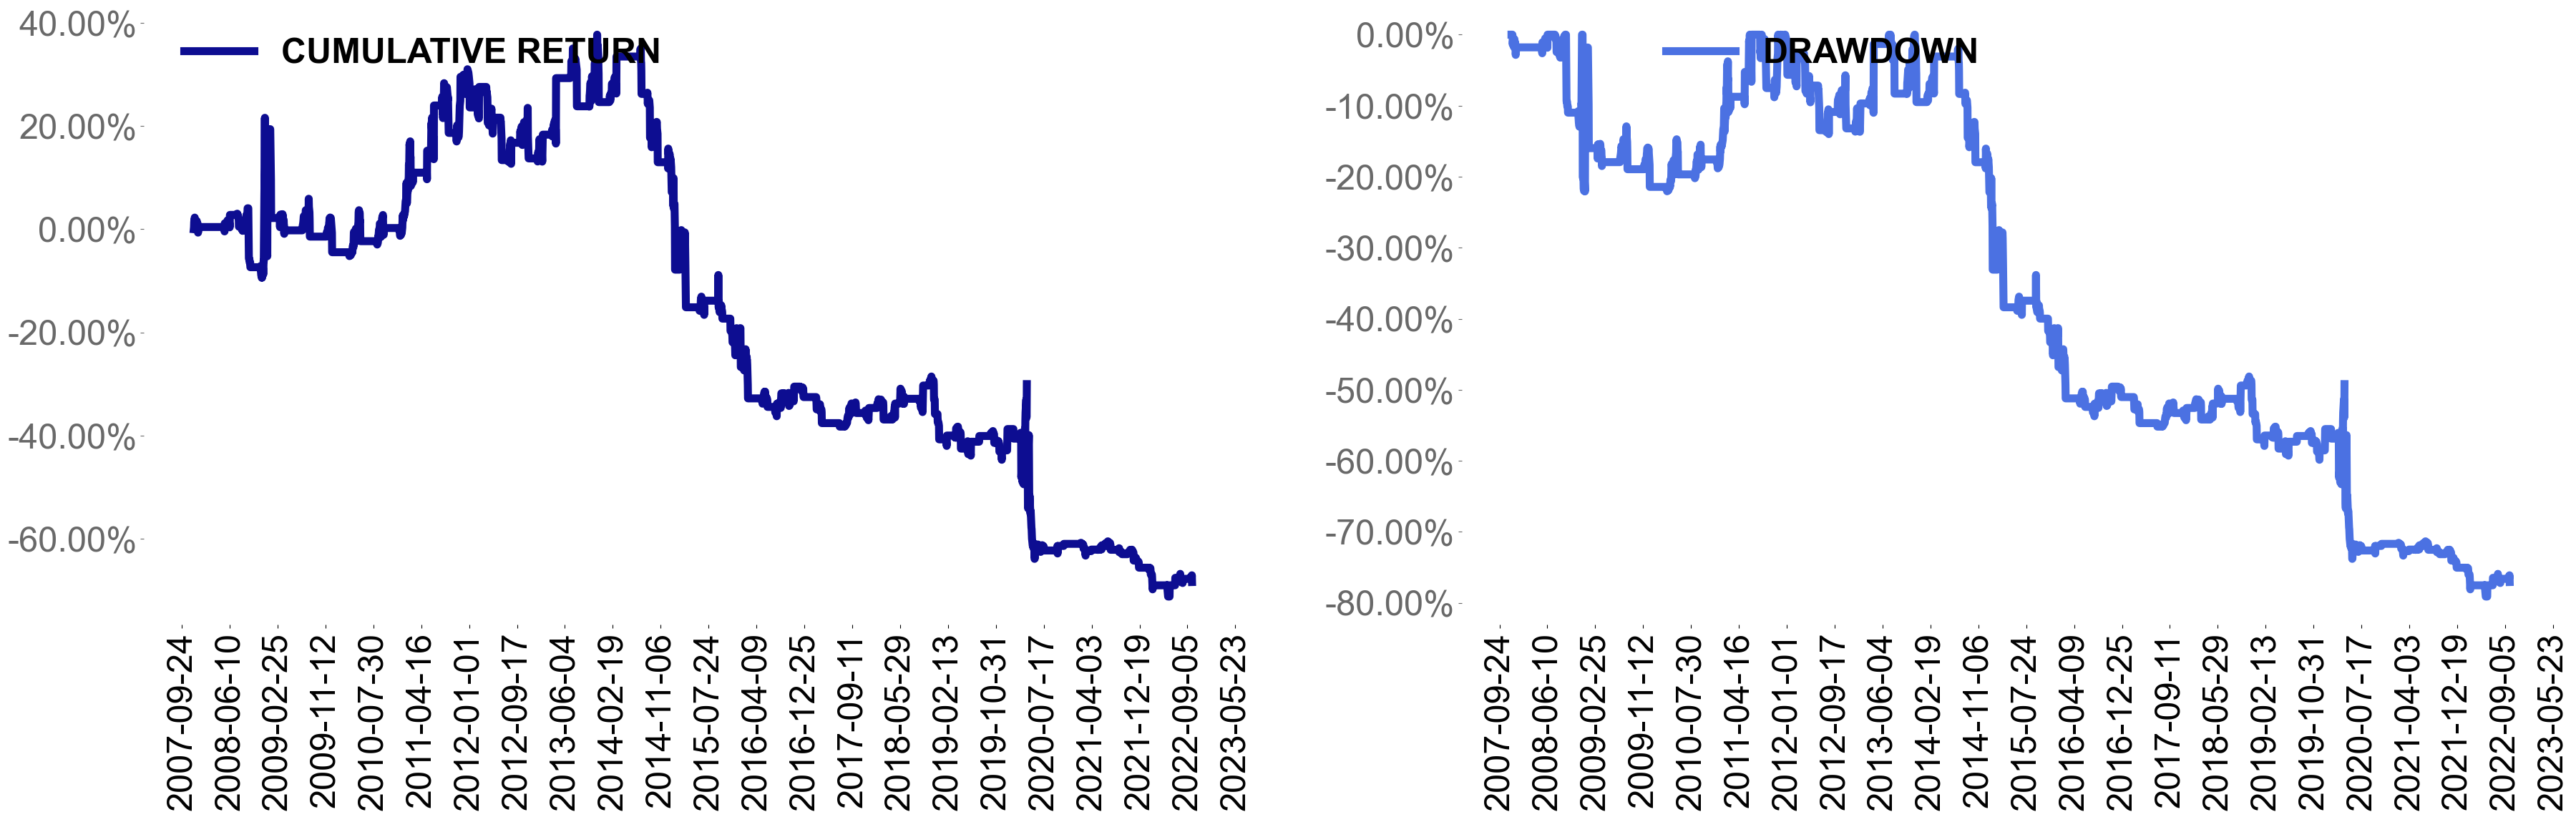

In [13]:
#PLOTS
tick_spacing1 = 260
tick_spacing2 = 260
tick_spacing3 = 260
FONTSIZE = 35
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=FONTSIZE)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)  # FIRST CHART IN THE FIRST SUBPLOT
ax1.plot(df_pair['DATE'],df_pair['ASSET1'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label=ASSET1,markersize=5)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=2,markerscale=3)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax1.tick_params(axis='y', color = 'darkblue', labelcolor='darkblue')
plt.box(on=None)

ax11 = ax1.twinx()
ax11.plot(df_pair['DATE'],df_pair['ASSET2'],marker='None', linestyle='solid',linewidth=8,color='royalblue',alpha = 0.95,label=ASSET2,markersize=5)
ax11.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.2),ncol=2,markerscale=3)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing2))
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax11.axis([None, None, None, None])
vals = ax11.get_yticks()
ax11.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax11.tick_params(axis='y', color = 'royalblue', labelcolor='royalblue')
plt.box(on=None)

ax2 = fig1.add_subplot(1, 2, 2)
ax2.plot(df_pair['DATE'],df_pair['QUOTIENT'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label='TRADING SIGNAL',markersize=5)
ax2.fill_between(df_pair['DATE'],2,4,color='dimgrey', alpha= 0.4)
ax2.fill_between(df_pair['DATE'],-2,-4,color='dimgrey', alpha= 0.4)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.7, 1.2),ncol=2,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax2.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

fig2 = plt.figure()
ax3 = fig2.add_subplot(1, 2, 1)
ax3.plot(df_trades['DATE'],df_trades['CUM_RETURN'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=5)
ax3.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax3.axis([None, None, None, None])
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax3.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

ax4 = fig2.add_subplot(1, 2, 2)
ax4.plot(df_trades['DATE'],df_trades['MAX_DRAWDOWN'],marker='None', linestyle='solid',linewidth=8,color='royalblue',alpha = 0.95,label='DRAWDOWN',markersize=5)
ax4.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax4.axis([None, None, None, None])
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax4.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

plt.show()


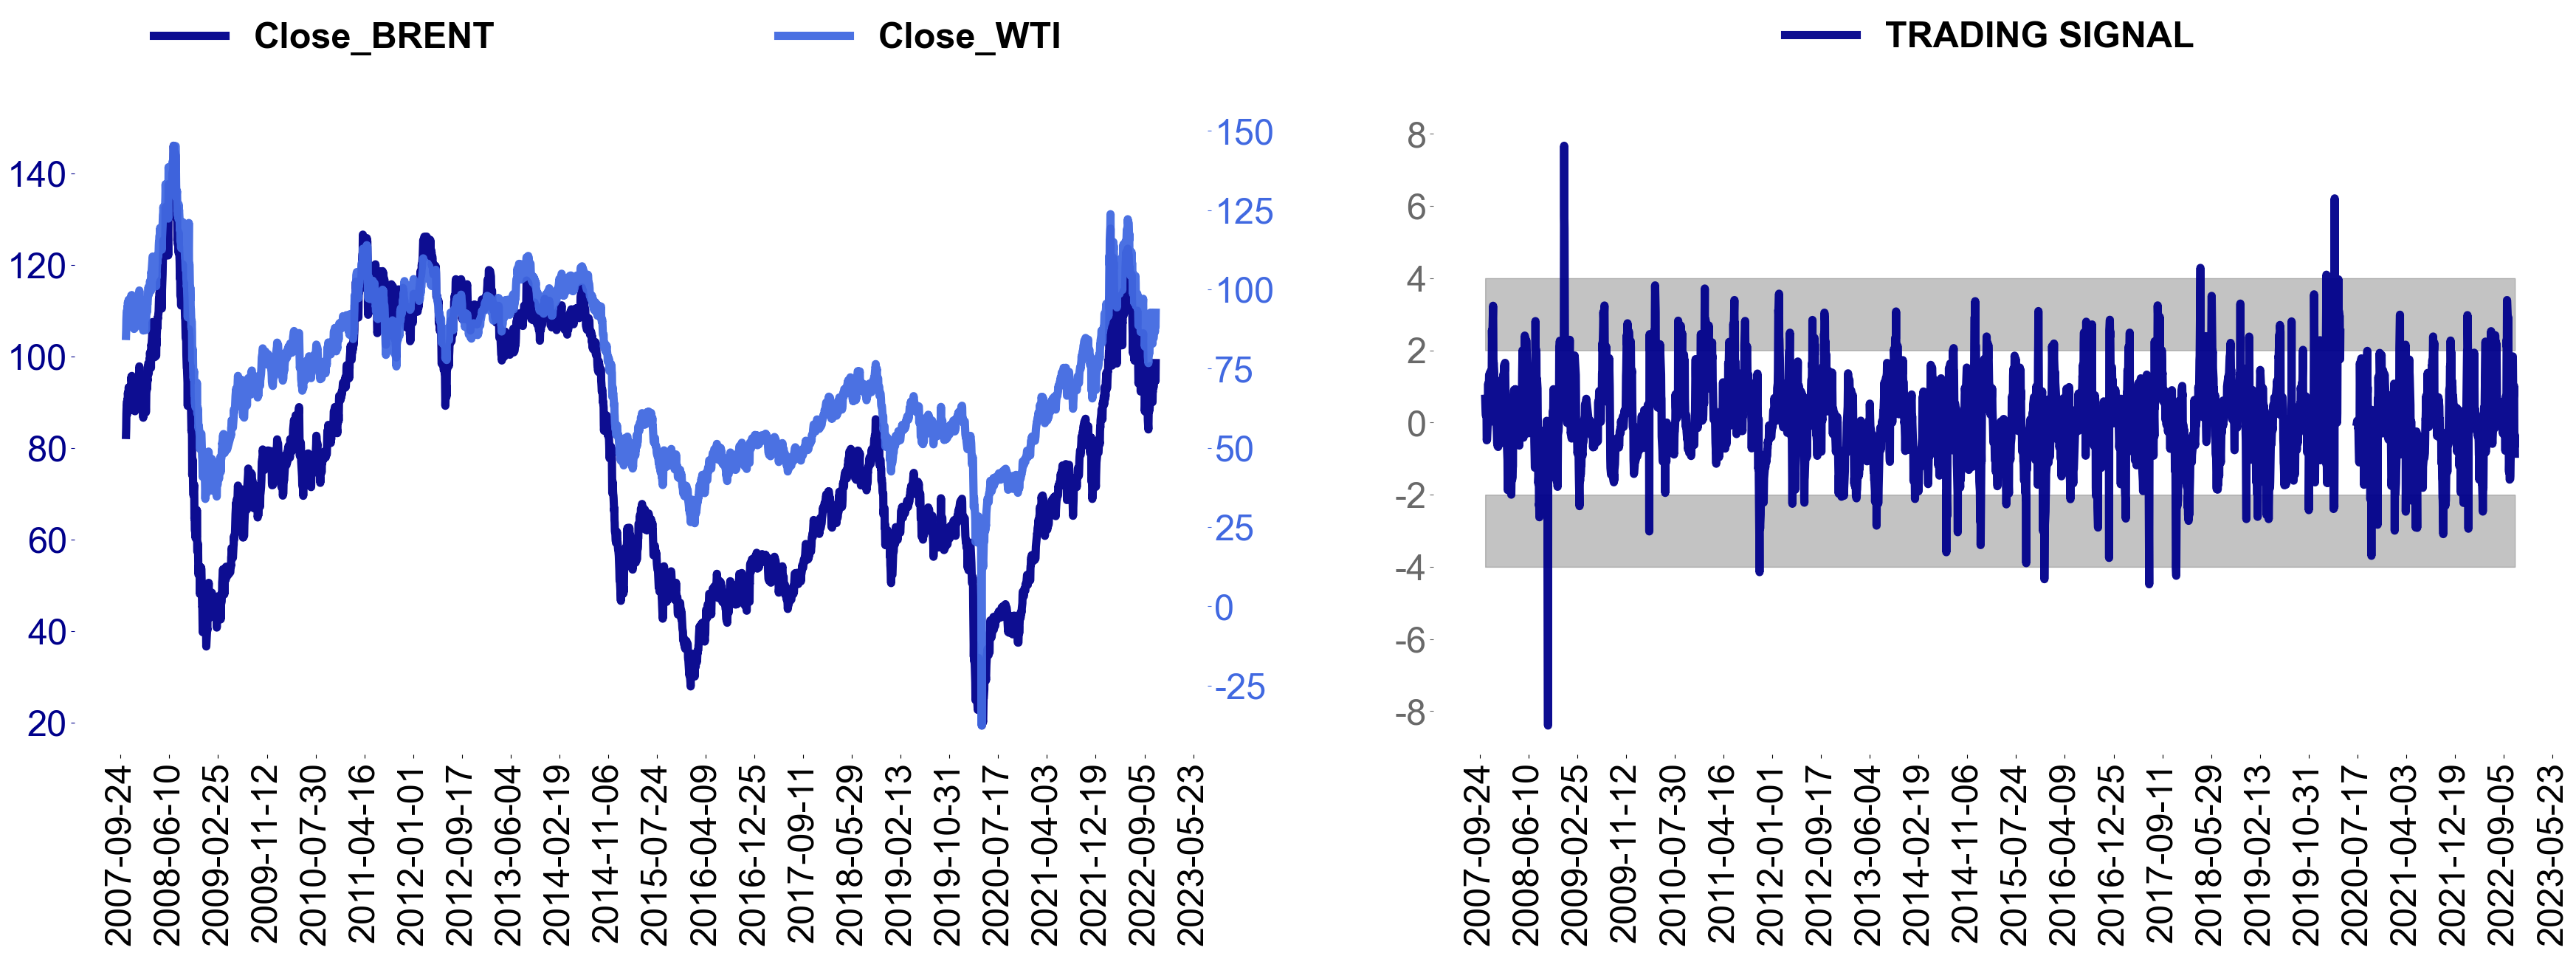

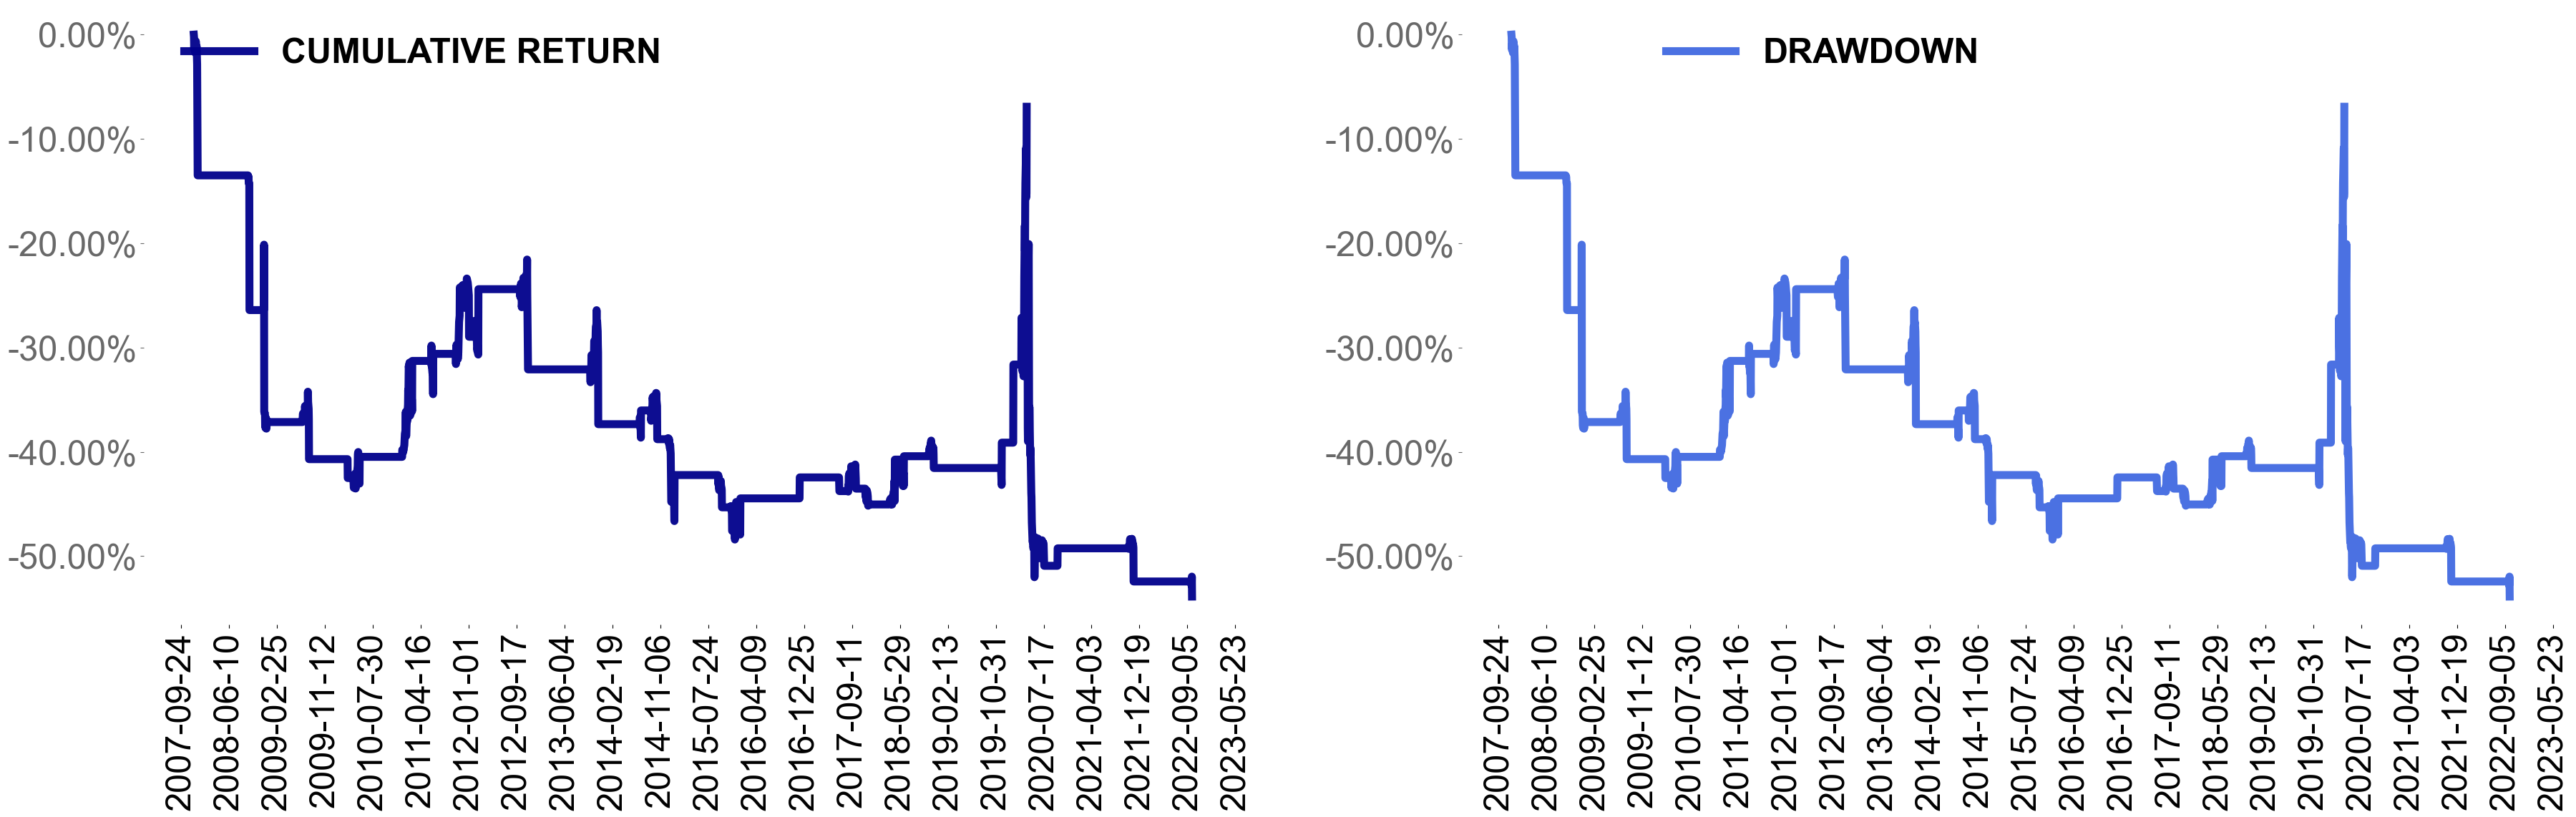

In [15]:
#BACKTESTING
#Parameters initialization
UP = 3
DOWN = -3
PROFIT = 0
df_pair['POSITION'].iloc[0]  = 'FLAT' 
POSITION = 'FLAT'
Trade = 'NTG'

def calculate_position(QUOTIENT):  
        
    global POSITION
    global TRADE     
    
    if POSITION == 'FLAT':        
        if QUOTIENT > UP:
            TRADE = 'SELL'
            POSITION = 'SHORT'
        elif QUOTIENT < DOWN:
            TRADE = 'BUY'
            POSITION = 'LONG'
        else: 
            TRADE = 'NTG'
            POSITION = 'FLAT'
    
    elif POSITION == 'SHORT':
        if QUOTIENT < PROFIT:
            TRADE = 'BUY'
            POSITION = 'FLAT'
        else: 
            TRADE = 'NTG'
            POSITION = 'SHORT'
    
    elif POSITION == 'LONG':    
        if QUOTIENT > PROFIT:
            TRADE = 'SELL'
            POSITION = 'FLAT'
        else: 
            TRADE = 'NTG'
            POSITION = 'LONG'       
        
    return POSITION, TRADE


results = df_pair.apply(lambda row: calculate_position(QUOTIENT=row['QUOTIENT']),axis=1)
df_pair['POSITION'] = [x[0] for x in results]
df_pair['TRADE'] = [x[1] for x in results]


df_trades = df_pair[df_pair['POSITION'].isin(['LONG', 'SHORT']) | df_pair['TRADE'].isin(['BUY', 'SELL'])]

# Calcular el retorno
df_trades['RETURN'] = df_trades['LOG_RET'].shift(-1) - df_trades['LOG_RET']

# Definir condiciones y elecciones
conditions = [
    (df_trades['POSITION'] == 'SHORT'),
    (df_trades['POSITION'] == 'LONG'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'BUY'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

# Usar np.nan para el valor predeterminado
df_trades['RETURN_SIGN'] = np.select(conditions, choices, default=np.nan)
df_trades['RETURN_SIGN'] = df_trades['RETURN_SIGN'].astype(float)

# Ajustar el cálculo de RETURN para casos específicos
df_trades.loc[((df_trades['POSITION'] == 'SHORT') & (df_trades['TRADE'] == 'SELL')) |
              ((df_trades['POSITION'] == 'LONG') & (df_trades['TRADE'] == 'BUY')), 'RETURN'] = 0

# Calcular retornos discretos
df_trades['DISCRETE_RETURN'] = np.exp(df_trades['RETURN'] * df_trades['RETURN_SIGN']) - 1

# Calcular retornos acumulados y otros indicadores
df_trades['CUM_RETURN'] = (1 + df_trades['DISCRETE_RETURN']).cumprod() - 1
df_trades['WEALTH_INDEX'] = 100 * (1 + df_trades['CUM_RETURN'])
df_trades['PREV_PEAK'] = df_trades['WEALTH_INDEX'].cummax()
df_trades['MAX_DRAWDOWN'] = (df_trades['WEALTH_INDEX'] - df_trades['PREV_PEAK']) / df_trades['PREV_PEAK']


#PLOTS
tick_spacing1 = 260
tick_spacing2 = 260
tick_spacing3 = 260
FONTSIZE = 35
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=FONTSIZE)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)  
ax1.plot(df_pair['DATE'],df_pair['ASSET1'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label=ASSET1,markersize=5)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=2,markerscale=3)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax1.tick_params(axis='y', color = 'darkblue', labelcolor='darkblue')
plt.box(on=None)

ax11 = ax1.twinx()
ax11.plot(df_pair['DATE'],df_pair['ASSET2'],marker='None', linestyle='solid',linewidth=8,color='royalblue',alpha = 0.95,label=ASSET2,markersize=5)
ax11.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.2),ncol=2,markerscale=3)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing2))
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax11.axis([None, None, None, None])
vals = ax11.get_yticks()
ax11.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax11.tick_params(axis='y', color = 'royalblue', labelcolor='royalblue')
plt.box(on=None)

ax2 = fig1.add_subplot(1, 2, 2)
ax2.plot(df_pair['DATE'],df_pair['QUOTIENT'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label='TRADING SIGNAL',markersize=5)
ax2.fill_between(df_pair['DATE'],2,4,color='dimgrey', alpha= 0.4)
ax2.fill_between(df_pair['DATE'],-2,-4,color='dimgrey', alpha= 0.4)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.7, 1.2),ncol=2,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:0,.0f}'.format(x) for x in vals])
ax2.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

fig2 = plt.figure()
ax3 = fig2.add_subplot(1, 2, 1)
ax3.plot(df_trades['DATE'],df_trades['CUM_RETURN'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=5)
ax3.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax3.axis([None, None, None, None])
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax3.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

ax4 = fig2.add_subplot(1, 2, 2)
ax4.plot(df_trades['DATE'],df_trades['MAX_DRAWDOWN'],marker='None', linestyle='solid',linewidth=8,color='royalblue',alpha = 0.95,label='DRAWDOWN',markersize=5)
ax4.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax4.axis([None, None, None, None])
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax4.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

plt.show()
